## Model Exp 4


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tkinter import Tk, filedialog # Untuk pop-up pilih file

# ==========================================
# 1. KONFIGURASI
# ==========================================
# Ganti dengan path model .keras Anda yang paling bagus
MODEL_PATH = r'Exp4_DenseNet121_Texture_final_model.keras'

# Ukuran gambar (HARUS SAMA dengan saat training)
IMG_SIZE = (150, 150)

# Daftar Label (Pastikan urutannya benar, biasanya urut abjad folder)
# Sesuaikan dengan nama folder di Google Drive/Hardisk Anda
class_names = [
    'Variasi 1 BAIK', 'Variasi 1 BURUK',
    'Variasi 2 BAIK', 'Variasi 2 BURUK',
    'Variasi 3 BAIK', 'Variasi 3 BURUK',
    'Variasi 4 BAIK', 'Variasi 4 BURUK',
    'Variasi 5 BAIK', 'Variasi 5 BURUK'
]

# ==========================================
# 2. FUNGSI PREDIKSI
# ==========================================
def predict_image(model, image_path):
    try:
        # A. Muat & Preprocess Gambar
        # Target size harus sama dengan input shape model
        img_original = load_img(image_path)
        img = load_img(image_path, target_size=IMG_SIZE)
        
        # Ubah ke Array
        x = img_to_array(img)
        
        # PENTING: Normalisasi (0-255 -> 0-1)
        # Kalau ini lupa, hasil prediksi bakal ngaco!
        x = x / 255.0
        
        # Tambah dimensi Batch (karena model minta input [Batch, Height, Width, Channel])
        # Dari (150, 150, 3) menjadi (1, 150, 150, 3)
        x = np.expand_dims(x, axis=0)
        
        # B. Prediksi
        predictions = model.predict(x)
        score = tf.nn.softmax(predictions[0]) # Ubah jadi probabilitas
        
        # Ambil index dengan nilai tertinggi
        predicted_class_idx = np.argmax(predictions[0])
        predicted_label = class_names[predicted_class_idx]
        confidence = np.max(predictions[0]) * 100 # Persentase

        # C. Tampilkan Hasil
        plt.figure(figsize=(6, 6))
        plt.imshow(img_original)
        plt.axis('off')
        
        result_text = f"Prediksi: {predicted_label}\nConfidence: {confidence:.2f}%"
        plt.title(result_text, color='green' if confidence > 80 else 'red', fontsize=14)
        plt.show()
        
        print(f"\n---> HASIL: {predicted_label}")
        print(f"---> Yakin: {confidence:.2f}%")
        
        # Tampilkan detail probabilitas semua kelas (opsional)
        print("\nDetail Probabilitas:")
        for i, prob in enumerate(predictions[0]):
            print(f"{class_names[i]}: {prob*100:.2f}%")
            
    except Exception as e:
        print(f"Error: {e}")

Sedang memuat model... (Tunggu sebentar)
✅ Model berhasil dimuat!

Memproses: C:/Users/Azvadennys/Downloads/WhatsApp Image 2026-01-19 at 15.02.05 (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


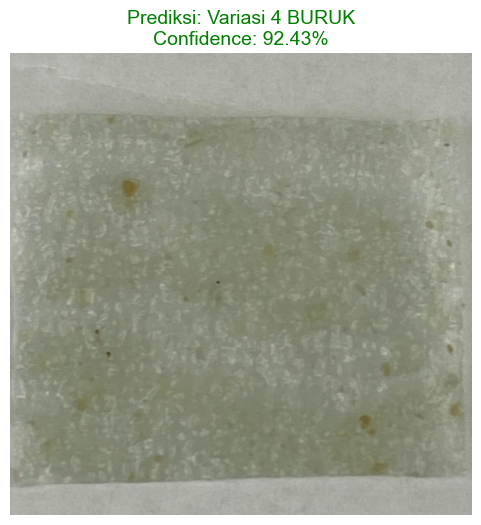


---> HASIL: Variasi 4 BURUK
---> Yakin: 92.43%

Detail Probabilitas:
Variasi 1 BAIK: 0.02%
Variasi 1 BURUK: 0.02%
Variasi 2 BAIK: 0.01%
Variasi 2 BURUK: 0.07%
Variasi 3 BAIK: 0.07%
Variasi 3 BURUK: 6.34%
Variasi 4 BAIK: 0.08%
Variasi 4 BURUK: 92.43%
Variasi 5 BAIK: 0.12%
Variasi 5 BURUK: 0.83%


In [8]:
if not os.path.exists(MODEL_PATH):
        print(f"❌ Model tidak ditemukan di: {MODEL_PATH}")
        print("Harap perbaiki path MODEL_PATH di bagian atas kode.")
else:
    print("Sedang memuat model... (Tunggu sebentar)")
    model = tf.keras.models.load_model(MODEL_PATH)
    print("✅ Model berhasil dimuat!")

    while True:
        choice = input("\nTekan [ENTER] untuk pilih gambar, atau ketik 'q' untuk keluar: ")
        if choice.lower() == 'q':
            break
            
        # Buka jendela file picker
        root = Tk()
        root.withdraw() # Sembunyikan jendela utama Tkinter
        root.attributes('-topmost', True) # Agar pop-up muncul di paling depan
            
        file_path = filedialog.askopenfilename(
            title="Pilih Gambar Edible Film",
            filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.bmp")]
        )
            
        if file_path:
            print(f"\nMemproses: {file_path}")
            predict_image(model, file_path)
        else:
            print("Tidak ada file yang dipilih.")